In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("TSLA.csv")                    #Read .csv file
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [3]:
df.dropna(inplace=True)                                                       # Removing null-values
df['Date'] = pd.to_datetime(df['Date'])                                       # Convert Date to float values
df['Date'] = df['Date'].map(dt.datetime.toordinal)

df_DC = df.drop(["Open","High","Low", "Adj Close", "Volume"], axis="columns") # Remove columns I dont use
df_DC.head(15)

,Date,Close
0,733952,4.778
1,733953,4.766
2,733954,4.392
3,733955,3.840
4,733959,3.222
5,733960,3.160
6,733961,3.492
7,733962,3.480
8,733965,3.410
9,733966,3.628


In [4]:
train, test = train_test_split(df_DC, test_size=0.33, random_state=42, shuffle=False)
#Seperating DF into a train and a test set

In [5]:
#Divide Date and Close to their own columns in both train and test set
train_date = train.drop("Close", axis = "columns")
train_close = train.drop ("Date", axis = "columns")

test_date = test.drop("Close", axis = "columns")
test_close = test.drop ("Date", axis = "columns")

In [6]:
reg_train = linear_model.LinearRegression()                           #Using linear regression on training set
reg_train.fit(train_date,train_close)
train_prediction = reg_train.predict(train_date)
test_prediction = reg_train.predict(test_date)

train_date_DT = train_date['Date'].apply(dt.datetime.fromordinal)     #Int train_date to DateTime

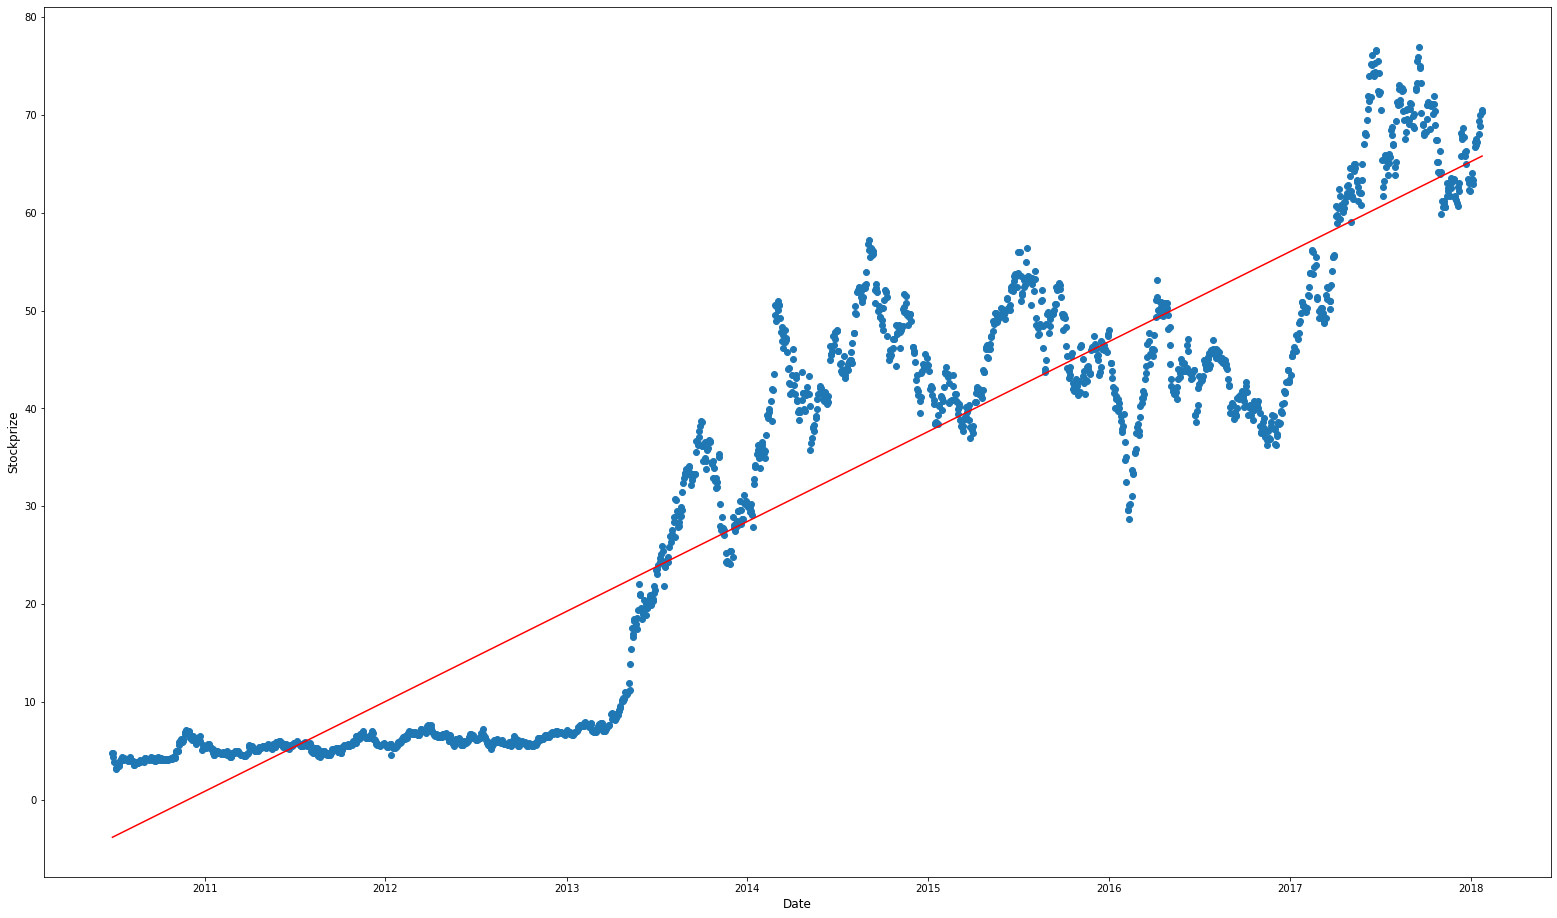

In [7]:
plt.figure(figsize=(27,16))                                   #plotting current data for train_data with Li
plt.xlabel('Date',fontsize=12)
plt.ylabel('Stockprize', fontsize=12)
plt.scatter(train_date_DT, train_close)
plt.plot(train_date_DT, train_prediction,color='red')

In [8]:
test_date_DT = test_date['Date'].apply(dt.datetime.fromordinal) #Int test_date to DateTime

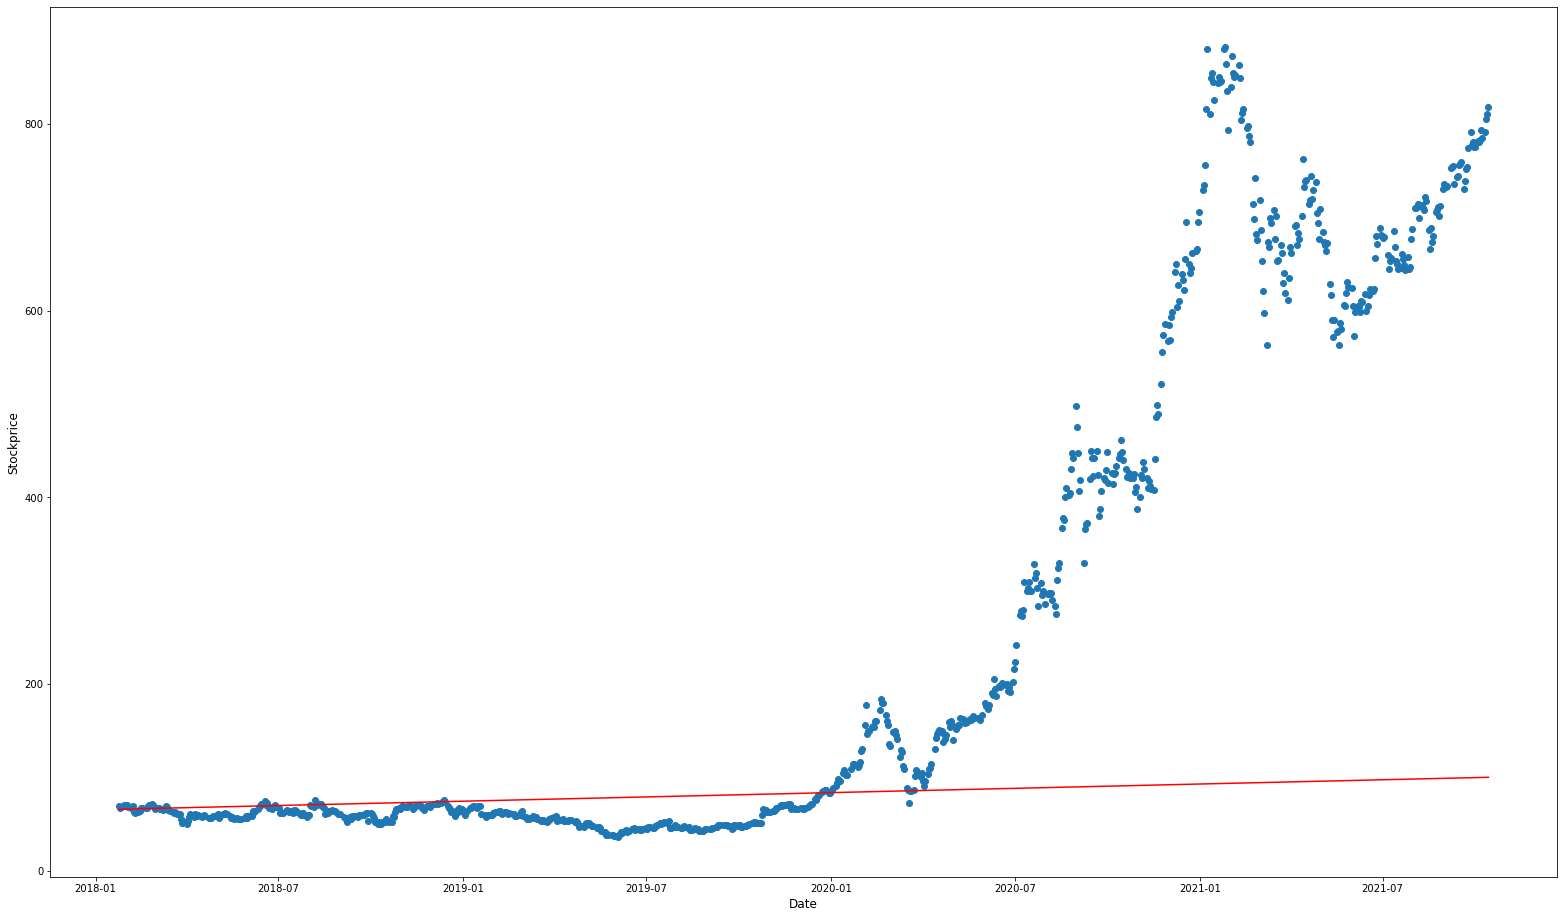

In [9]:
plt.figure(figsize=(27,16))                                      # Plot for visualising predictions on the Test Dataset
plt.xlabel('Date',fontsize=12)
plt.ylabel('Stockprice',fontsize=12)
plt.scatter(test_date_DT,test_close)                            # Visual Represention of linear equation with Linear Regression
plt.plot(test_date_DT, test_prediction,color='red')

In [10]:
input_date = dt.date(2023, 9, 3)                             # Formating input date before input to the prediction algorithm
input_od = input_date.toordinal()

output_train = reg_train.predict([[input_od]])           # Prediction stockprice based on input date

formated_date = input_date.strftime("%D");                   # Formating input date and predicted stockprice before output
formated_stockprice = str('%.2f' % output_train[0][0])
                                                             # Outputing the prediction
outputString = "Predicted stock price for the date " + formated_date + " is: " + formated_stockprice;
print(outputString)

Predicted stock price for the date 09/03/23 is: 117.42
